# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [4]:
from __future__ import print_function, division

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

### Get mean, and standard deviation of people sample

### CLT - Central Limit Theorem = statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

### A normal distribution has a bell-shaped density curve described by its mean   and standard deviation  . The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation.

### If a dataset follows a normal distribution, then about 68% of the observations will fall within 1 standard deviation of the mean. About 95% of the observations will fall within 2 standard deviations of the mean, and about 99.7% of the observations will fall within 3 standard deviations of the mean.

In [5]:
avg_temp = df.temperature.mean()
temp_std = df.temperature.std()

def sdp(std_number):
    more = avg_temp + (temp_std * std_number)
    less = avg_temp - (temp_std * std_number)
    temp_range = (df['temperature'] < more) & (df['temperature'] > less)
    
    count = df.loc[temp_range]['temperature'].count()
    
    return count/130

In [6]:
one_sdp = sdp(1)
two_sdp = sdp(2)
three_sdp = sdp(3)

sdp_range = '{} - {} - {}'.format(one_sdp, two_sdp, three_sdp)
sdp_range

'0.6923076923076923 - 0.9461538461538461 - 0.9923076923076923'

### The distribution is normal because the percent of the sample within 1, 2, and 3 standard deviations from the mean is about 69%, 95%, and 99.7% as mentioned above.

### Observations are independent

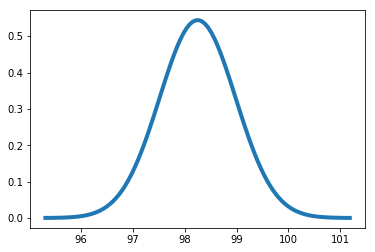

In [7]:
# A sample of 130 people and their gender, heart_rate, and body temperature

# Create distribution from data getting the mean, quartiles, min, max, and standard deviation

temp_dist = scipy.stats.norm(avg_temp, temp_std)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

xs, ys = eval_pdf(temp_dist)
plt.plot(xs, ys, label='male', linewidth=4)
plt.show()

### 1) Repeat sample model 100 times and get a distribution of sampling means
### 2) The mean of that distribution should be very close to the true mean
### 3) Get standard deviation of population by dividing std of sample by sqrt of sample size

In [31]:
pop_std = temp_std/130**.5
pop_std

0.06430441683789101

### Get distribution of sample means, resampled 10000 times.

In [44]:
def summarize_sampling_distribution(sample_stats):
    print('SE', sample_stats.std())
    print('90% CI', np.percentile(sample_stats, [5, 95]))
    
def create_sampling_dist(sample, resamples=1000):
    sample_means = [np.random.choice(sample, len(sample), replace=True).mean() for i in range(resamples)]
    return sample_means

sample_means = create_sampling_dist(df.temperature, 10000)
sm_dev = sample_means.std()
sm_mean = sample_means.mean()

sm_dist = scipy.stats.norm(sm_mean, sm_dev)

xs, ys = eval_pdf(sm_dist)
plt.plot(xs, ys, label='sample statistic', linewidth=4)
plt.show()

AttributeError: 'list' object has no attribute 'std'

# Z-Stat vs. T-Stat

### T-Distribution = engineered to give you a better estimate of your confidence intervals when you do have a small sample size e.g.   Less than 30 observations.

### When looking at T-Table for T-Distribution to get a percent confidence interval, there is a One Sided Row, and Two Sided Row
* Two Sided should be used when distribution is normal, and symmetric around the center.

### T-Table has 'degrees of freedom', which is the index in the table, and is the size of the sample minus 1. So if the sample size is 7 we will look for 6

In [47]:
# Estimated total population = 7000000000
sample_variance = df.temperature.var()
sample_variance**.5

0.7331831580389454

In [48]:
temp_std

0.7331831580389454

In [60]:
# Standard deviation of population is std of sample divided by square root of sample size

x = temp_std/130**.5
y = x * 2.58
high_confidence_pop_mean = '{} - {}'.format(avg_temp - y, avg_temp + y)
high_confidence_pop_mean

'98.08332537378902 - 98.41513616467253'

## 99% confident that average body temperature of entire planet lies somewhere between 98.08 and 98.41 degrees

### How good of a sample is it though ?

### Is confidence interval, and margin of error the same thing ?

### Like you can get a confidence interval with 99% confidence, you can also get percent confidence for any given interval around the mean of a sample.
* Create sampling distribution of sample means
* Get standard deviation of sampling mean distribution "sample standard deviation / sqrt of sample length"
    * e.g. 40 / 6 = 6.67 => Best estimate of the standard deviation of the sampling distribution of the sample mean.
    
* If sample mean is 112, and the interval is 100 - 124, the interval either lies 12 above or below the sample mean
* We divide that number, 12, by the best estimate of the std of the sample dist of the sample mean 6.67 to get the number of standard deviations above and below the mean for the range we are looking for, which in this case is 1.8
* "What is the probability that our one sample mean is within 1.8 standard deviations of our sampling distribution mean"
* Go to Z-Table and get value for 1.8 => .9641
* Subtract .5 from it, since Z-Score goes from the very left of the distribution to whatever standard deviation to the right of the mean you are looking for.
* Multiply that number, .4641, by two since it is that value to the left and right of the sample mean.
* There is a 92.82% chance that the hypothetical population mean is within 100 and 124

## Comparing population proportions "Men vs. Women body temp"
* Get mean, and variance of both men temperature, and women temperature.
* Create a new distribution that is made up of the difference between the men and women sample distributions
* Men mean - Women mean for the mean /  STD = √Men variance + Women Variance
* Next we want to be confident that there is a 95% chance that the difference of means between men and women will be within some number, D, of the difference.

## Example of the final confidence interval of the difference of population proportions
### "There is a 95% chance that the true population difference of the proportions is within .043 of the actual difference of the sample proportions that we got."